# Plot efficency differences

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator

In [2]:
# Carica i dati
results_data = pd.read_csv("result_parallelism_linux.csv")
librerie_esterne_data = pd.read_csv("librerie_esterne.csv")

In [3]:
results_data

,Matrix,Convergence,SolverType,PrecisionRequired,Iterations,TimeSpent(ms),OS
0,spa1.mtx,True,JacobiSolver,1.000000e-04,130,4088.5500,Linux
1,spa1.mtx,True,GaussSeidelSolver,1.000000e-04,12,273.6878,Linux
2,spa1.mtx,True,GradientSolver,1.000000e-04,6211,115014.6438,Linux
3,spa1.mtx,True,ConjugateGradientSolver,1.000000e-04,164,1587.7212,Linux
4,spa1.mtx,True,JacobiSolver,1.000000e-06,197,3513.3061,Linux
...,...,...,...,...,...,...,...
59,vem2.mtx,True,ConjugateGradientSolver,1.000000e-08,71,3629.6196,Linux
60,vem2.mtx,True,JacobiSolver,1.000000e-10,8656,838795.2649,Linux
61,vem2.mtx,True,GaussSeidelSolver,1.000000e-10,4443,432471.2498,Linux
62,vem2.mtx,True,GradientSolver,1.000000e-10,5665,570939.4602,Linux


## tempo singola iterazione

In [4]:
# Group by 'SolverType' and 'PrecisionRequired'
grouped = results_data.groupby(['SolverType', 'PrecisionRequired'])

# Calculate Iterations/TimeSpent(ms) for each tuple and then the mean of these values
results_data['Efficiency'] = results_data['Iterations'] / results_data['TimeSpent(ms)']
efficiency_mean = grouped['Efficiency'].mean().reset_index()

# Display the mean efficiency
print(efficiency_mean)

                 SolverType  PrecisionRequired  Efficiency
0   ConjugateGradientSolver       1.000000e-10    0.045619
1   ConjugateGradientSolver       1.000000e-08    0.045448
2   ConjugateGradientSolver       1.000000e-06    0.045468
3   ConjugateGradientSolver       1.000000e-04    0.044775
4         GaussSeidelSolver       1.000000e-10    0.023936
5         GaussSeidelSolver       1.000000e-08    0.023543
6         GaussSeidelSolver       1.000000e-06    0.023032
7         GaussSeidelSolver       1.000000e-04    0.020835
8            GradientSolver       1.000000e-10    0.023846
9            GradientSolver       1.000000e-08    0.023737
10           GradientSolver       1.000000e-06    0.023692
11           GradientSolver       1.000000e-04    0.023383
12             JacobiSolver       1.000000e-10    0.024349
13             JacobiSolver       1.000000e-08    0.024419
14             JacobiSolver       1.000000e-06    0.024215
15             JacobiSolver       1.000000e-04    0.0181

## Sparsità matrice

Number of non-zero elements: 21225
Matrix shape: (2601, 2601)


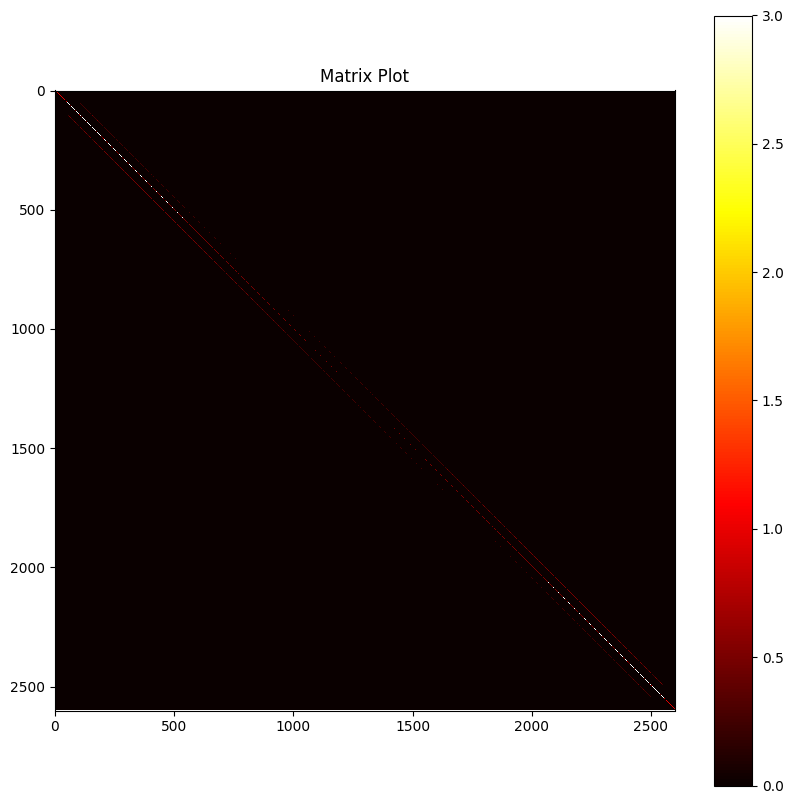

In [5]:
from scipy.io import mmread
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the matrix
def plot_matrix_from_mtx(file_path):
    # Read the matrix from the MTX file
    matrix = mmread(file_path).toarray()
    
    # Take the absolute value of the matrix
    matrix = np.abs(matrix)
    
    # Count non-zero elements
    non_zero_count = np.count_nonzero(matrix)
    print(f"Number of non-zero elements: {non_zero_count}")
    
    # Print the shape of the matrix
    print(f"Matrix shape: {matrix.shape}")
    
    # Plot the matrix
    plt.figure(figsize=(10, 10))
    plt.imshow(matrix, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Matrix Plot')
    plt.show()

# Example usage
plot_matrix_from_mtx('vem2.mtx')

## Spa1

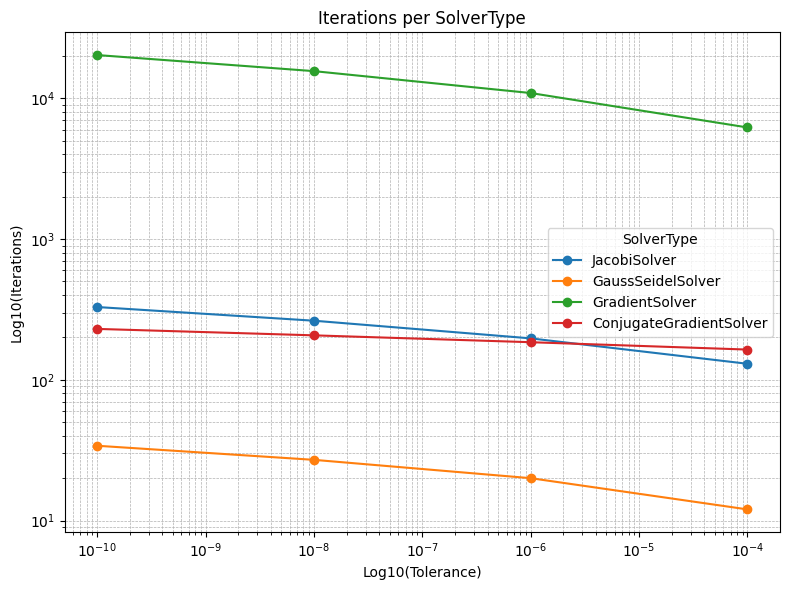

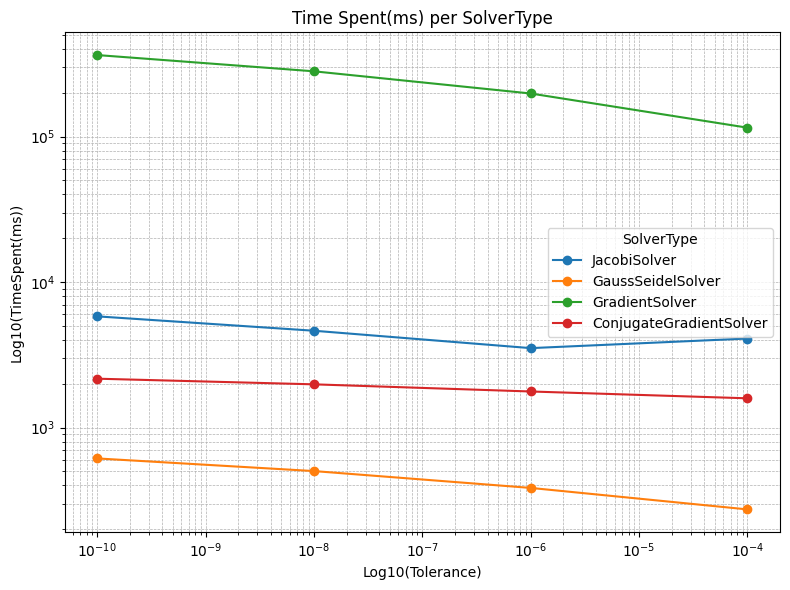

In [6]:
# Filtra i dati per il Blocco 1 e la matrice spa1
block_1_spa1 = results_data[
    (results_data['Matrix'] == "spa1.mtx")
]

# Primo grafico: Log10(Iterations)
plt.figure(figsize=(8, 6))
for solver in block_1_spa1['SolverType'].unique():
    solver_data = block_1_spa1[block_1_spa1['SolverType'] == solver]
    plt.plot(
        solver_data['PrecisionRequired'],
        solver_data['Iterations'],
        marker='o',
        label=solver
    )
plt.title("Iterations per SolverType")
plt.xlabel("Log10(Tolerance)")
plt.ylabel("Log10(Iterations)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="SolverType")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Secondo grafico: Log10(TimeSpent(ms))
plt.figure(figsize=(8, 6))
for solver in block_1_spa1['SolverType'].unique():
    solver_data = block_1_spa1[block_1_spa1['SolverType'] == solver]
    plt.plot(
        solver_data['PrecisionRequired'],
        solver_data['TimeSpent(ms)'],
        marker='o',
        label=solver
    )
plt.title("Time Spent(ms) per SolverType")
plt.xlabel("Log10(Tolerance)")
plt.ylabel("Log10(TimeSpent(ms))")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="SolverType")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()
 

## Spa2

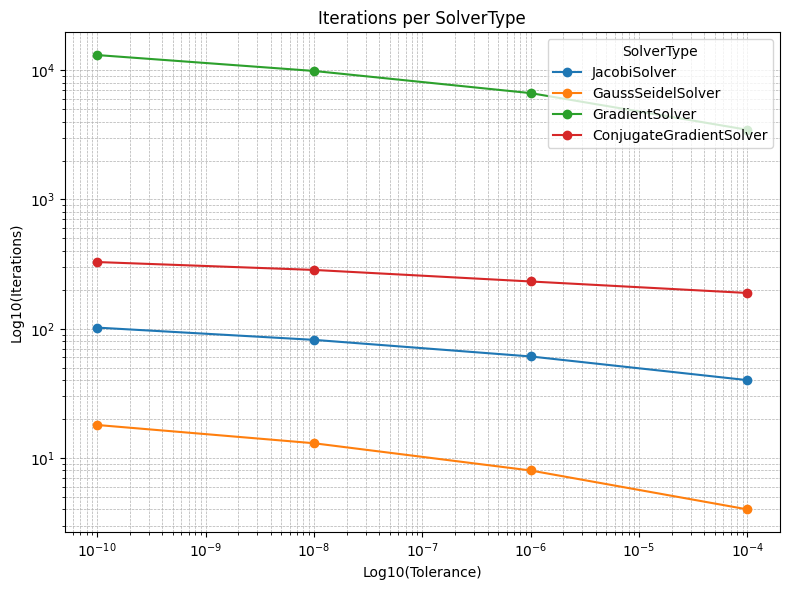

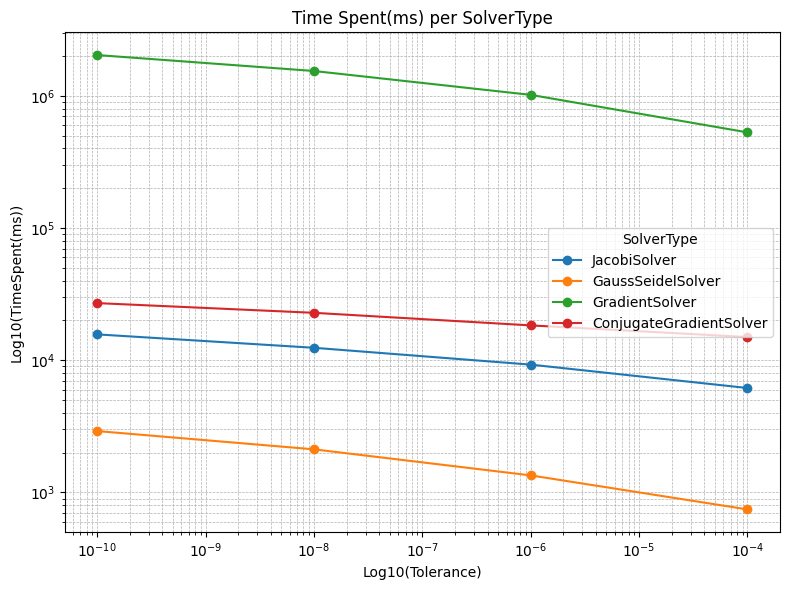

In [7]:
# Filtra i dati per il Blocco 1 e la matrice spa1
block_1_spa1 = results_data[
    #(results_data['Block'] == "Block 1 (Less Performant Machine)") & 
    (results_data['Matrix'] == "spa2.mtx")
]

# Primo grafico: Log10(Iterations)
plt.figure(figsize=(8, 6))
for solver in block_1_spa1['SolverType'].unique():
    solver_data = block_1_spa1[block_1_spa1['SolverType'] == solver]
    plt.plot(
        solver_data['PrecisionRequired'],
        solver_data['Iterations'],
        marker='o',
        label=solver
    )
plt.title("Iterations per SolverType")
plt.xlabel("Log10(Tolerance)")
plt.ylabel("Log10(Iterations)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="SolverType")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Secondo grafico: Log10(TimeSpent(ms))
plt.figure(figsize=(8, 6))
for solver in block_1_spa1['SolverType'].unique():
    solver_data = block_1_spa1[block_1_spa1['SolverType'] == solver]
    plt.plot(
        solver_data['PrecisionRequired'],
        solver_data['TimeSpent(ms)'],
        marker='o',
        label=solver
    )
plt.title("Time Spent(ms) per SolverType")
plt.xlabel("Log10(Tolerance)")
plt.ylabel("Log10(TimeSpent(ms))")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="SolverType")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()


## vem1

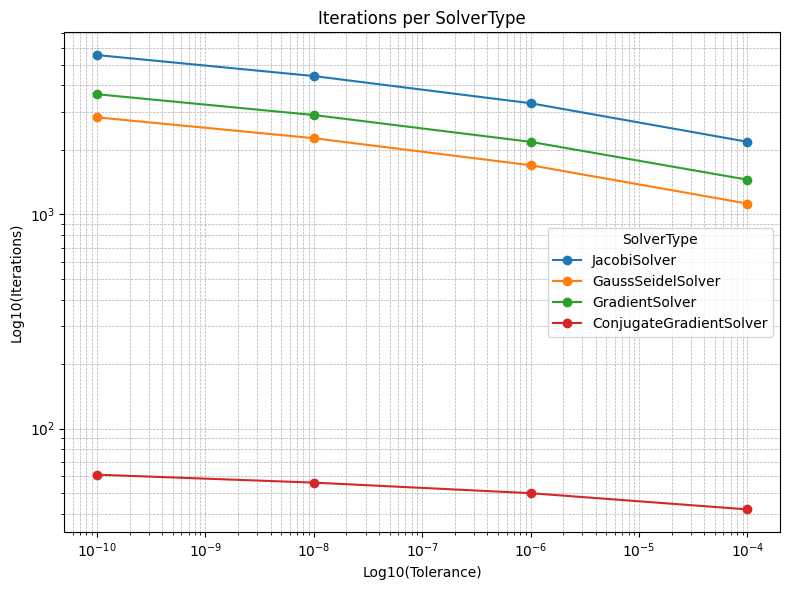

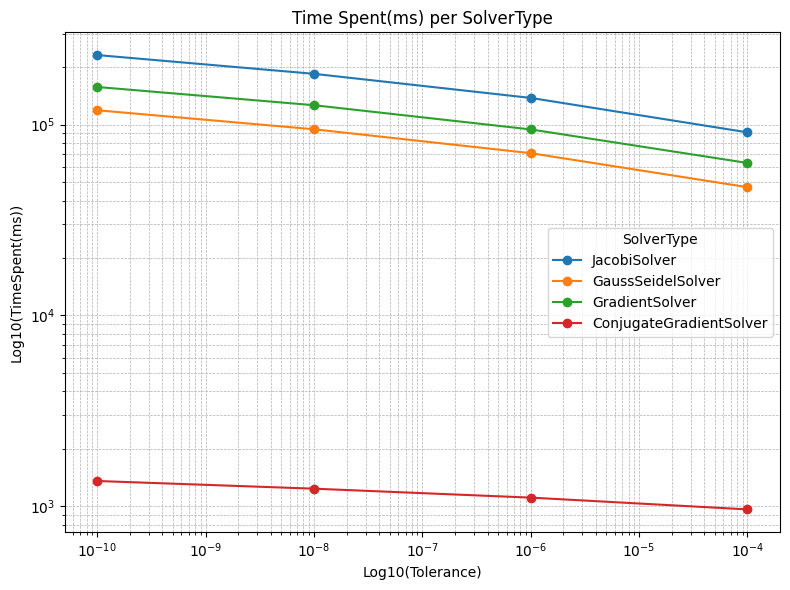

In [8]:
# Filtra i dati per il Blocco 1 e la matrice spa1
block_1_spa1 = results_data[
    (results_data['Matrix'] == "vem1.mtx")
]

# Primo grafico: Log10(Iterations)
plt.figure(figsize=(8, 6))
for solver in block_1_spa1['SolverType'].unique():
    solver_data = block_1_spa1[block_1_spa1['SolverType'] == solver]
    plt.plot(
        solver_data['PrecisionRequired'],
        solver_data['Iterations'],
        marker='o',
        label=solver
    )
plt.title("Iterations per SolverType")
plt.xlabel("Log10(Tolerance)")
plt.ylabel("Log10(Iterations)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="SolverType")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Secondo grafico: Log10(TimeSpent(ms))
plt.figure(figsize=(8, 6))
for solver in block_1_spa1['SolverType'].unique():
    solver_data = block_1_spa1[block_1_spa1['SolverType'] == solver]
    plt.plot(
        solver_data['PrecisionRequired'],
        solver_data['TimeSpent(ms)'],
        marker='o',
        label=solver
    )
plt.title("Time Spent(ms) per SolverType")
plt.xlabel("Log10(Tolerance)")
plt.ylabel("Log10(TimeSpent(ms))")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="SolverType")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()
 

## Vem2

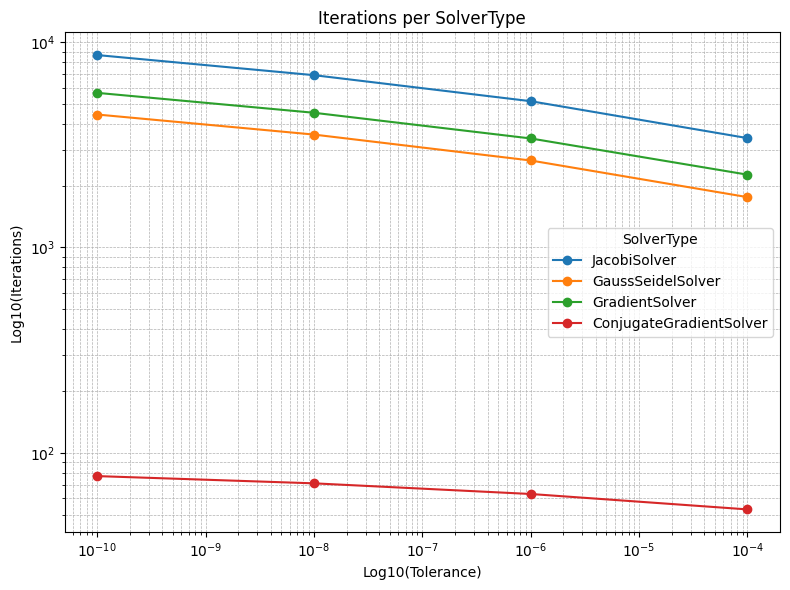

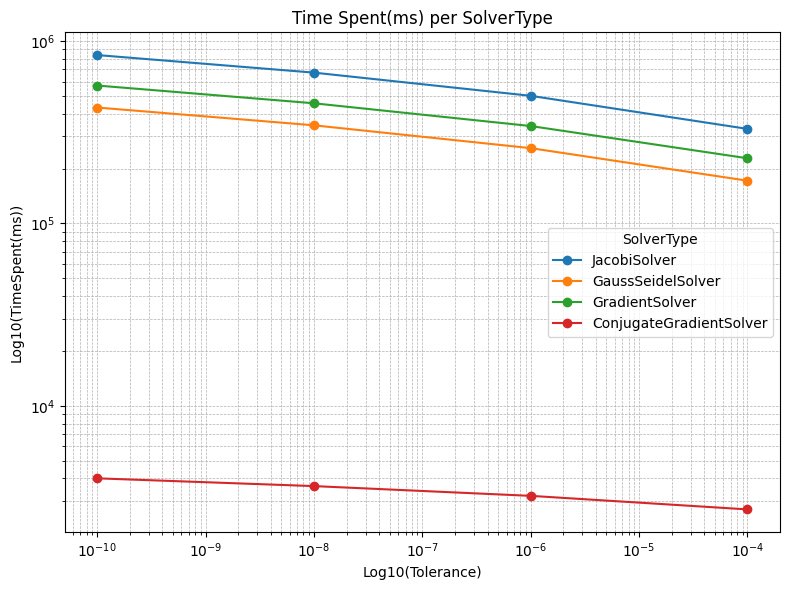

In [9]:
# Filtra i dati per il Blocco 1 e la matrice spa1
block_1_spa1 = results_data[
    (results_data['Matrix'] == "vem2.mtx")
]

# Primo grafico: Log10(Iterations)
plt.figure(figsize=(8, 6))
for solver in block_1_spa1['SolverType'].unique():
    solver_data = block_1_spa1[block_1_spa1['SolverType'] == solver]
    plt.plot(
        solver_data['PrecisionRequired'],
        solver_data['Iterations'],
        marker='o',
        label=solver
    )
plt.title("Iterations per SolverType")
plt.xlabel("Log10(Tolerance)")
plt.ylabel("Log10(Iterations)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="SolverType")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Secondo grafico: Log10(TimeSpent(ms))
plt.figure(figsize=(8, 6))
for solver in block_1_spa1['SolverType'].unique():
    solver_data = block_1_spa1[block_1_spa1['SolverType'] == solver]
    plt.plot(
        solver_data['PrecisionRequired'],
        solver_data['TimeSpent(ms)'],
        marker='o',
        label=solver
    )
plt.title("Time Spent(ms) per SolverType")
plt.xlabel("Log10(Tolerance)")
plt.ylabel("Log10(TimeSpent(ms))")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="SolverType")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()
 

## Comparaison librerie open source

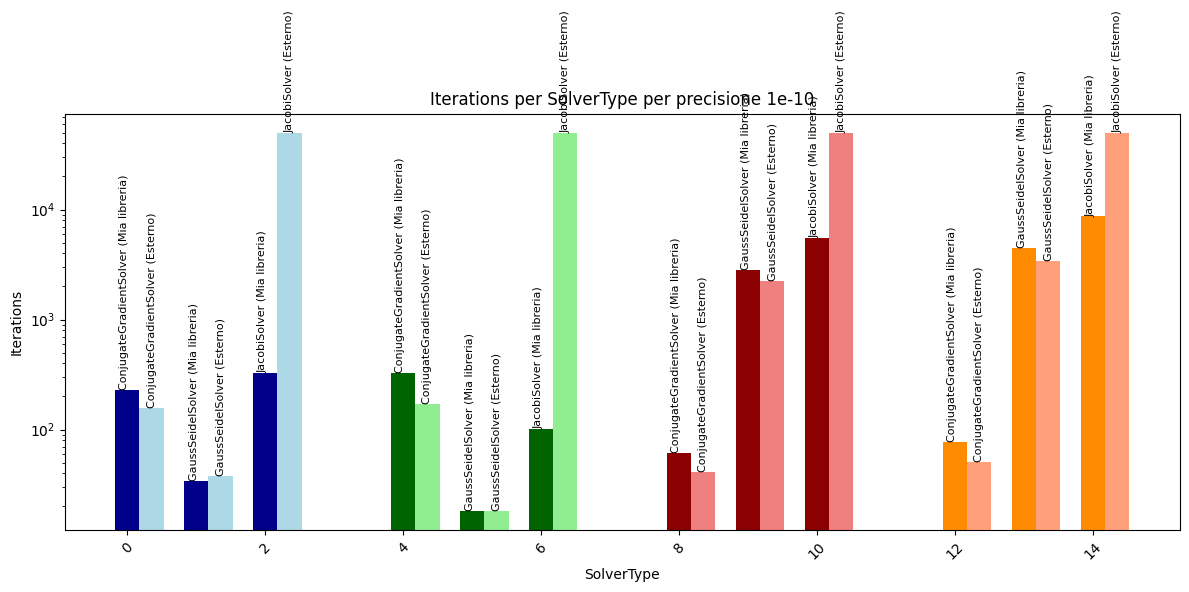

In [10]:
matrices = ['spa1.mtx', 'spa2.mtx', 'vem1.mtx', 'vem2.mtx']
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange']
light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize=(12, 6))
bar_width = 0.35
index_offset = 0

for i, matrix in enumerate(matrices):
    # Filtra i dati per la matrice corrente
    filtered_data = results_data[(results_data['Matrix'] == matrix) & (results_data['PrecisionRequired'] == 1e-10)]
    filtered_external_data = librerie_esterne_data[librerie_esterne_data['Matrix'] == matrix]

    # Raggruppa per 'SolverType' e 'PrecisionRequired'
    grouped_data = filtered_data.groupby(['SolverType', 'PrecisionRequired'])['Iterations'].mean().reset_index()
    grouped_external_data = filtered_external_data.groupby(['SolverType', 'PrecisionRequired'])['Iterations'].mean().reset_index()

    # Merge the internal and external data on 'SolverType' and 'PrecisionRequired'
    merged_data = pd.merge(grouped_data, grouped_external_data, on=['SolverType', 'PrecisionRequired'], suffixes=('_internal', '_external'))

    # Plot internal and external data side by side
    index = np.arange(len(merged_data)) + index_offset
    plt.bar(index, merged_data['Iterations_internal'], bar_width, label=f'{matrix} Internal Data', color=colors[i])
    plt.bar(index + bar_width, merged_data['Iterations_external'], bar_width, label=f'{matrix} External Data', color=light_colors[i])

    # Add solver names and data source labels
    for j, row in merged_data.iterrows():
        plt.text(index[j] - bar_width / 8, row['Iterations_internal'], f"{row['SolverType']} (Mia libreria)", ha='center', va='bottom', fontsize=8, rotation=90)
        plt.text(index[j] + bar_width , row['Iterations_external'], f"{row['SolverType']} (Esterno)", ha='center', va='bottom', fontsize=8, rotation=90)

    index_offset += len(merged_data) + 1  # Add space between different matrices

plt.title("Iterations per SolverType per precisione 1e-10")
plt.xlabel("SolverType")
plt.ylabel("Iterations")
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

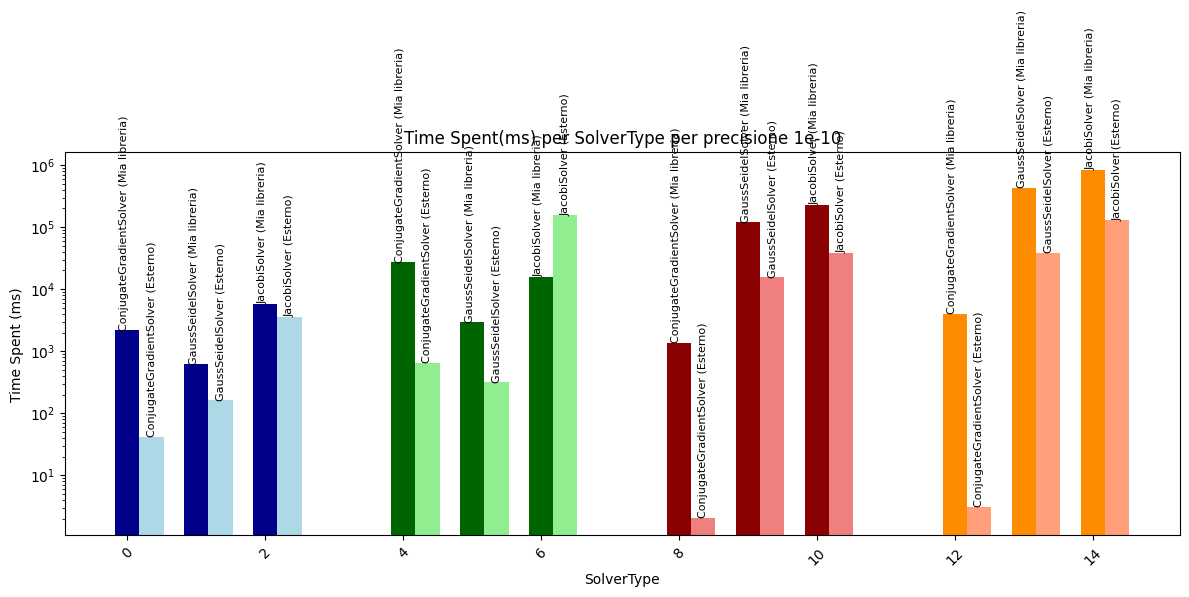

In [11]:
matrices = ['spa1.mtx', 'spa2.mtx', 'vem1.mtx', 'vem2.mtx']
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange']
light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize=(12, 6))
bar_width = 0.35
index_offset = 0

for i, matrix in enumerate(matrices):
    # Filtra i dati per la matrice corrente
    filtered_data = results_data[(results_data['Matrix'] == matrix) & (results_data['PrecisionRequired'] == 1e-10)]
    filtered_external_data = librerie_esterne_data[librerie_esterne_data['Matrix'] == matrix]

    # Raggruppa per 'SolverType' e 'PrecisionRequired'
    grouped_data = filtered_data.groupby(['SolverType', 'PrecisionRequired'])['TimeSpent(ms)'].mean().reset_index()
    grouped_external_data = filtered_external_data.groupby(['SolverType', 'PrecisionRequired'])['TimeSpent(ms)'].mean().reset_index()

    # Merge the internal and external data on 'SolverType' and 'PrecisionRequired'
    merged_data = pd.merge(grouped_data, grouped_external_data, on=['SolverType', 'PrecisionRequired'], suffixes=('_internal', '_external'))

    # Plot internal and external data side by side
    index = np.arange(len(merged_data)) + index_offset
    plt.bar(index, merged_data['TimeSpent(ms)_internal'], bar_width, label=f'{matrix} Internal Data', color=colors[i])
    plt.bar(index + bar_width, merged_data['TimeSpent(ms)_external'], bar_width, label=f'{matrix} External Data', color=light_colors[i])

    # Add solver names and data source labels
    for j, row in merged_data.iterrows():
        plt.text(index[j] - bar_width / 8, row['TimeSpent(ms)_internal'], f"{row['SolverType']} (Mia libreria)", ha='center', va='bottom', fontsize=8, rotation=90)
        plt.text(index[j] + bar_width , row['TimeSpent(ms)_external'], f"{row['SolverType']} (Esterno)", ha='center', va='bottom', fontsize=8, rotation=90)

    index_offset += len(merged_data) + 1  # Add space between different matrices

plt.title("Time Spent(ms) per SolverType per precisione 1e-10")
plt.xlabel("SolverType")
plt.ylabel("Time Spent (ms)")
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()


## Paragone OSs

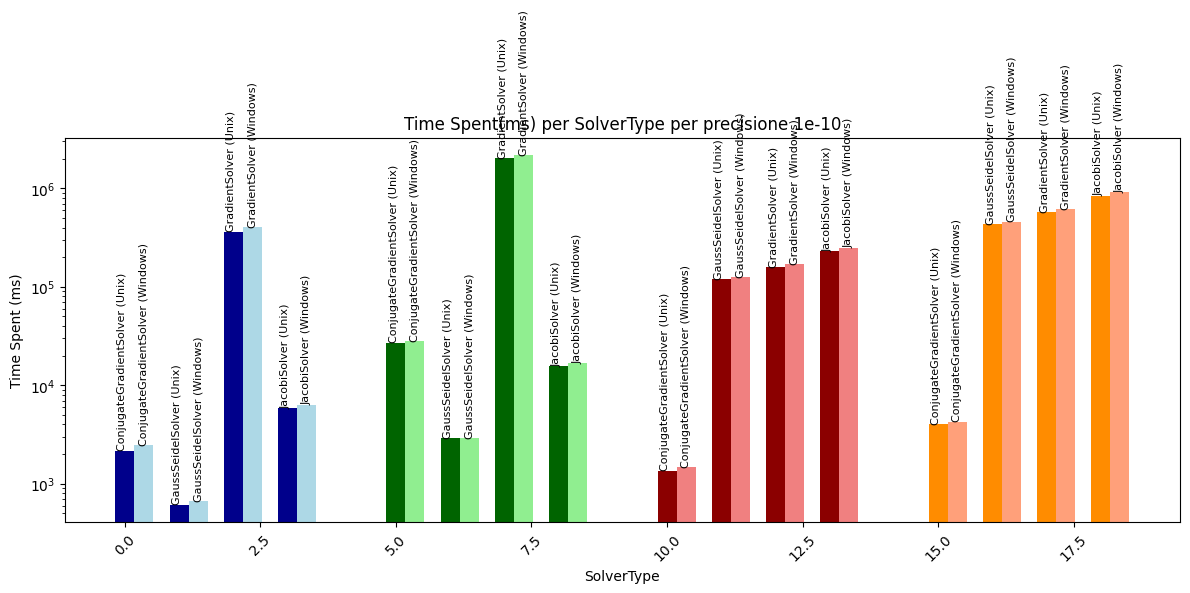

In [12]:
# Carica i dati
unix_data = pd.read_csv("result_parallelism_linux.csv")
windows_data = pd.read_csv("result_parallelism_windows.csv")

matrices = ['spa1.mtx', 'spa2.mtx', 'vem1.mtx', 'vem2.mtx']
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange']
light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize=(12, 6))
bar_width = 0.35
index_offset = 0

for i, matrix in enumerate(matrices):
    # Filtra i dati per la matrice corrente
    filtered_unix_data = unix_data[(unix_data['Matrix'] == matrix) & (unix_data['PrecisionRequired'] == 1e-10)]
    filtered_windows_data = windows_data[(windows_data['Matrix'] == matrix) & (windows_data['PrecisionRequired'] == 1e-10)]

    # Raggruppa per 'SolverType' e 'PrecisionRequired'
    grouped_unix_data = filtered_unix_data.groupby(['SolverType', 'PrecisionRequired'])['TimeSpent(ms)'].mean().reset_index()
    grouped_windows_data = filtered_windows_data.groupby(['SolverType', 'PrecisionRequired'])['TimeSpent(ms)'].mean().reset_index()

    # Merge the unix and windows data on 'SolverType' and 'PrecisionRequired'
    merged_data = pd.merge(grouped_unix_data, grouped_windows_data, on=['SolverType', 'PrecisionRequired'], suffixes=('_unix', '_windows'))

    # Plot unix and windows data side by side
    index = np.arange(len(merged_data)) + index_offset
    plt.bar(index, merged_data['TimeSpent(ms)_unix'], bar_width, label=f'{matrix} Unix Data', color=colors[i])
    plt.bar(index + bar_width, merged_data['TimeSpent(ms)_windows'], bar_width, label=f'{matrix} Windows Data', color=light_colors[i])

    # Add solver names and data source labels
    for j, row in merged_data.iterrows():
        plt.text(index[j] - bar_width / 8, row['TimeSpent(ms)_unix'], f"{row['SolverType']} (Unix)", ha='center', va='bottom', fontsize=8, rotation=90)
        plt.text(index[j] + bar_width, row['TimeSpent(ms)_windows'], f"{row['SolverType']} (Windows)", ha='center', va='bottom', fontsize=8, rotation=90)

    index_offset += len(merged_data) + 1  # Add space between different matrices

plt.title("Time Spent(ms) per SolverType per precisione 1e-10")
plt.xlabel("SolverType")
plt.ylabel("Time Spent (ms)")
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()


-------------

## Altra roba

In [13]:
# Aggiungi una colonna per identificare i blocchi nel file results.csv
results_data['Block'] = (results_data['OS'] != results_data['OS'].shift()).cumsum()
block_mapping = {
    1: "Block 1 (Less Performant Machine)",
    2: "Block 2 (More Performant Machine)",
    3: "Block 3 (More Performant Machine with Parallelism)",
    4: "Block 4 (Different OS)"
}
results_data['Block'] = results_data['Block'].map(block_mapping)

In [14]:
# Funzione per creare i grafici
def plot_comparison(data, blocks, title, filename):
    filtered_data = data[data['Block'].isin(blocks)]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=filtered_data, x="Matrix", y="Iterations", hue="Block", ci=None)
    plt.title(title)
    plt.ylabel("Time Spent (ms)")
    plt.xlabel("Matrix")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Block")
    plt.tight_layout()
    plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_3060\2299366400.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x="Matrix", y="Iterations", hue="Block", ci=None)


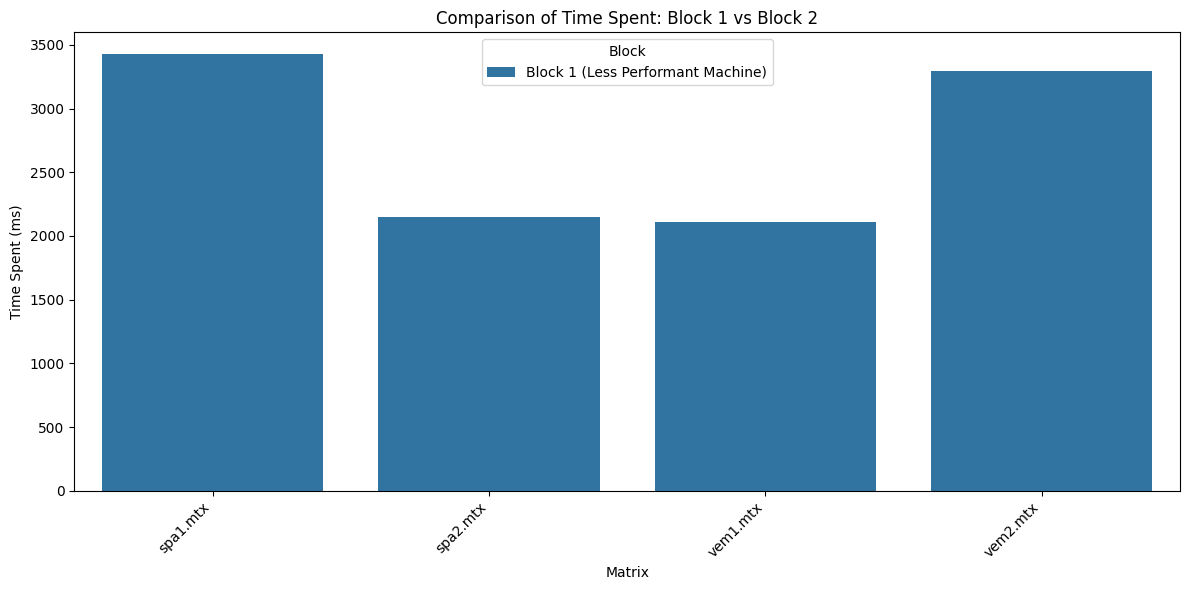

In [15]:
# 1. Paragone tra Block 1 e Block 2
plot_comparison(
    results_data,
    ["Block 1 (Less Performant Machine)", "Block 2 (More Performant Machine)"],
    "Comparison of Time Spent: Block 1 vs Block 2",
    "block1_vs_block2.png"
)

C:\Users\admin\AppData\Local\Temp\ipykernel_3060\2299366400.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x="Matrix", y="Iterations", hue="Block", ci=None)
C:\Users\admin\AppData\Local\Temp\ipykernel_3060\2299366400.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Block")


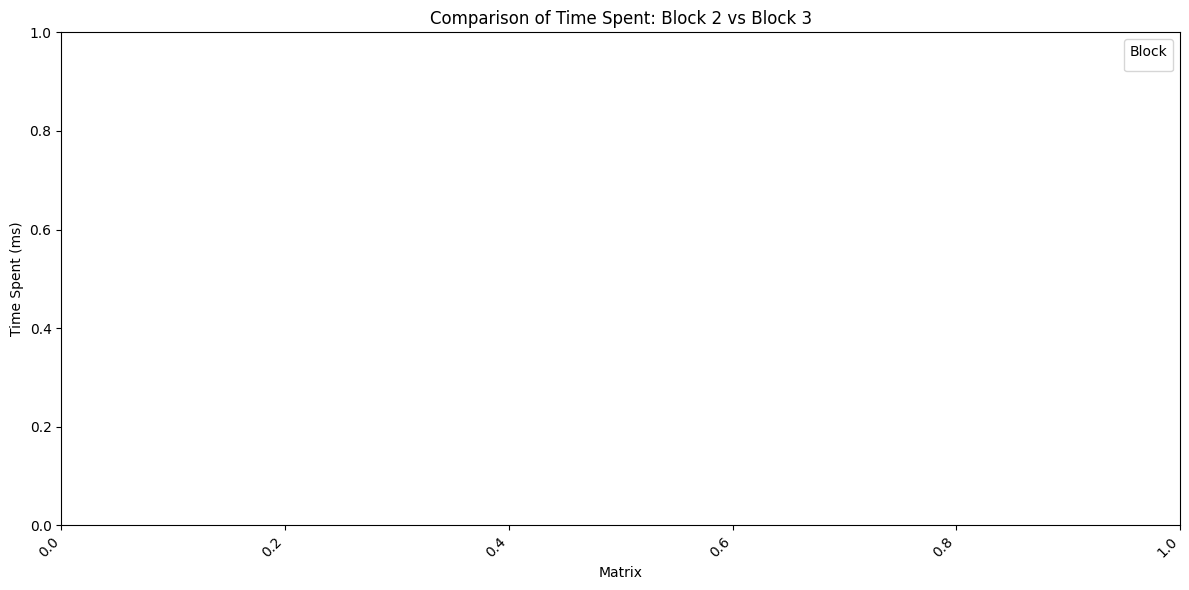

In [16]:
# 2. Paragone tra Block 2 e Block 3
plot_comparison(
    results_data,
    ["Block 2 (More Performant Machine)", "Block 3 (More Performant Machine with Parallelism)"],
    "Comparison of Time Spent: Block 2 vs Block 3",
    "block2_vs_block3.png"
)

C:\Users\admin\AppData\Local\Temp\ipykernel_3060\2299366400.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x="Matrix", y="Iterations", hue="Block", ci=None)
C:\Users\admin\AppData\Local\Temp\ipykernel_3060\2299366400.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Block")


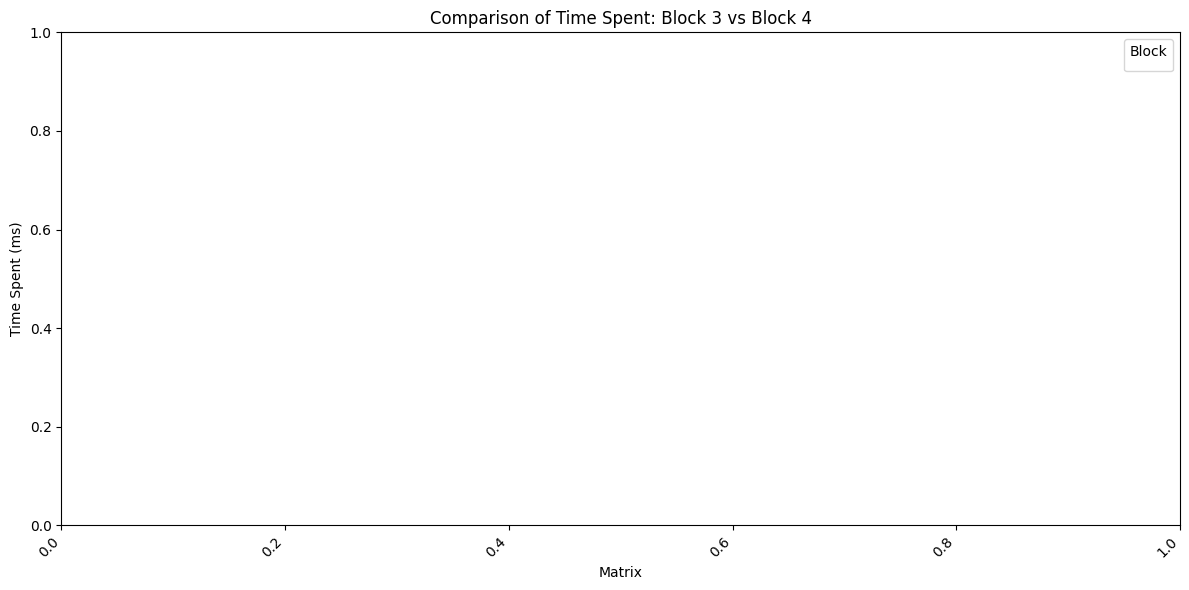

In [17]:
# 3. Paragone tra Block 3 e Block 4
plot_comparison(
    results_data,
    ["Block 3 (More Performant Machine with Parallelism)", "Block 4 (Different OS)"],
    "Comparison of Time Spent: Block 3 vs Block 4",
    "block3_vs_block4.png"
)

In [18]:
# 4. Paragone tra Block 3 e librerie_esterne.csv
librerie_esterne_data['Block'] = "External Libraries"
combined_data = pd.concat([
    results_data[results_data['Block'] == "Block 3 (More Performant Machine with Parallelism)"],
    librerie_esterne_data
])


C:\Users\admin\AppData\Local\Temp\ipykernel_3060\2299366400.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x="Matrix", y="Iterations", hue="Block", ci=None)


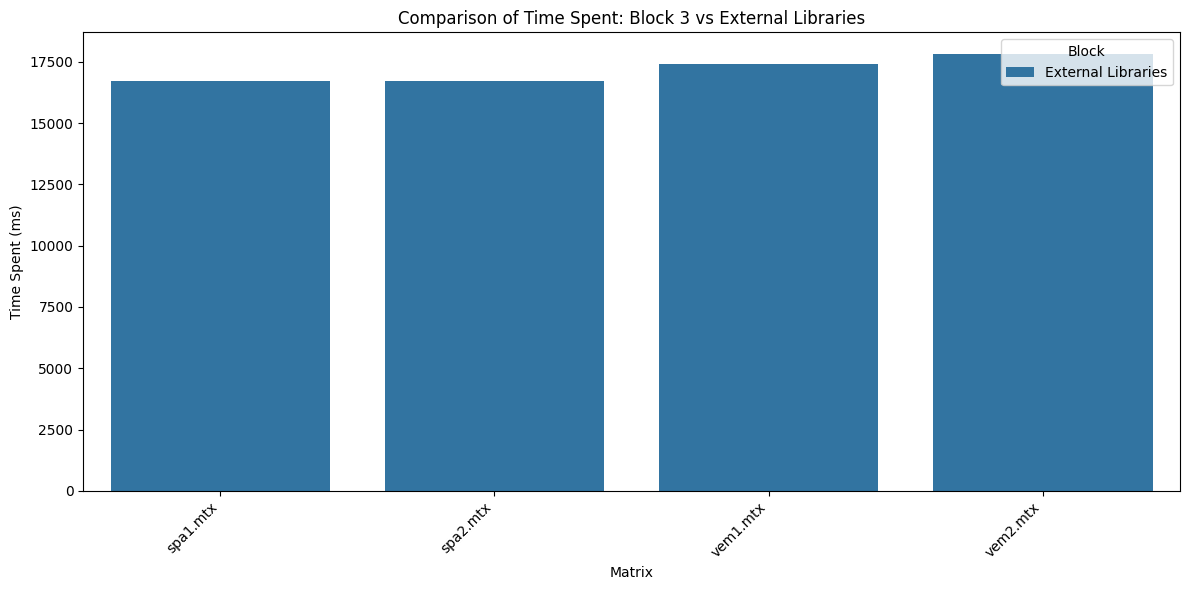

In [19]:
plot_comparison(
    combined_data,
    ["Block 3 (More Performant Machine with Parallelism)", "External Libraries"],
    "Comparison of Time Spent: Block 3 vs External Libraries",
    "block3_vs_external.png"
)